In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Import Library

In [ ]:
!pip install split-folders
!pip install tensorflow
!pip install keras_tuner
!pip install tensorflowjs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from imblearn.over_sampling import SMOTEN # Contoh teknik balancing untuk data kategorikal
from collections import Counter
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, AUC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import pickle
import tensorflowjs as tfjs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrizkyfajar","key":"c1a041284a4cdab130e20ca57f837ef8"}'}

# Setup Folder dan Split Dataset Manual

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 74 Jun 13 03:59 kaggle.json


In [ ]:
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset
!unzip heart-disease-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 606MB/s]
Archive:  heart-disease-health-indicators-dataset.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
# Muat setiap dataset
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
# df_lung_cancer = pd.read_csv('lung_cancer_prediction_dataset.csv') # Opsional, jika ingin menambahkan kanker paru

print("Dataset berhasil dimuat.")
print(f"Shape Heart Disease: {df_heart.shape}")
# print(f"Shape Lung Cancer: {df_lung_cancer.shape}")

Dataset berhasil dimuat.
Shape Heart Disease: (253680, 22)


In [ ]:
df_heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Eksplorasi Data Awal (EDA) dan Pembersihan

## EDA untuk Heart Disease Dataset

In [ ]:
print("\n--- EDA untuk Heart Disease Dataset ---")
print(df_heart.head())
print(df_heart.info())
print("\nMissing Value:\n", df_heart.isnull().sum())
print("\n", df_heart['HeartDiseaseorAttack'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Heart Disease Dataset ---
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  Ph

In [ ]:
'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk'

('PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk')

In [ ]:
kolom_kategorik1 = ['Sex', 'Education', 'Smoker', 'Diabetes', 'Income', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
for kolom in kolom_kategorik1:
    print(f"Unique values di kolom '{kolom}':")
    print(df_heart[kolom].unique())
    print('-' * 40)

Unique values di kolom 'Sex':
[0. 1.]
----------------------------------------
Unique values di kolom 'Education':
[4. 6. 3. 5. 2. 1.]
----------------------------------------
Unique values di kolom 'Smoker':
[1. 0.]
----------------------------------------
Unique values di kolom 'Diabetes':
[0. 2. 1.]
----------------------------------------
Unique values di kolom 'Income':
[3. 1. 8. 6. 4. 7. 2. 5.]
----------------------------------------
Unique values di kolom 'PhysActivity':
[0. 1.]
----------------------------------------
Unique values di kolom 'Fruits':
[0. 1.]
----------------------------------------
Unique values di kolom 'Veggies':
[1. 0.]
----------------------------------------
Unique values di kolom 'HvyAlcoholConsump':
[0. 1.]
----------------------------------------
Unique values di kolom 'AnyHealthcare':
[1. 0.]
----------------------------------------
Unique values di kolom 'NoDocbcCost':
[0. 1.]
----------------------------------------
Unique values di kolom 'GenHlth':

In [ ]:
df_heart = df_heart[df_heart['Diabetes'] != 1]

In [ ]:
print("\nBanyaknya Data perstatus Stroke ", df_heart['Stroke'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data perstatus Diabetes ", df_heart['Diabetes'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data perstatus Penyakit Jantung ", df_heart['HeartDiseaseorAttack'].value_counts(normalize=False)) # Distribusi target


Banyaknya Data perstatus Stroke  Stroke
0.0    239022
1.0     10027
Name: count, dtype: int64

Banyaknya Data perstatus Diabetes  Diabetes
0.0    213703
2.0     35346
Name: count, dtype: int64

Banyaknya Data perstatus Penyakit Jantung  HeartDiseaseorAttack
0.0    225820
1.0     23229
Name: count, dtype: int64


## Visualisasi Data

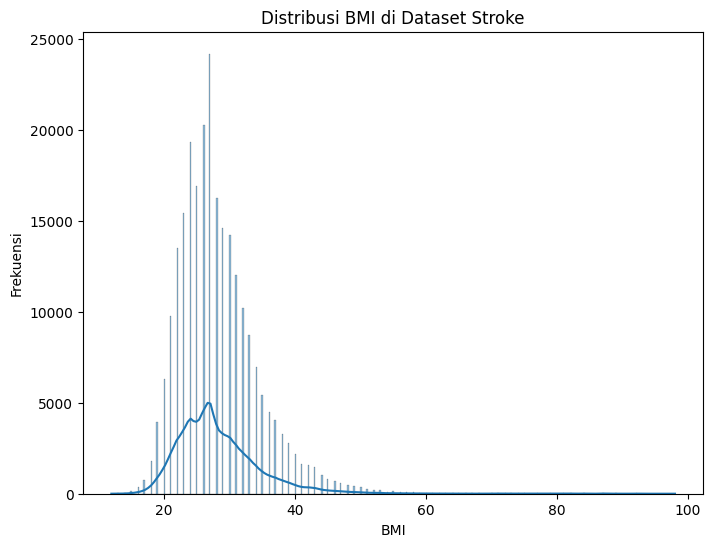

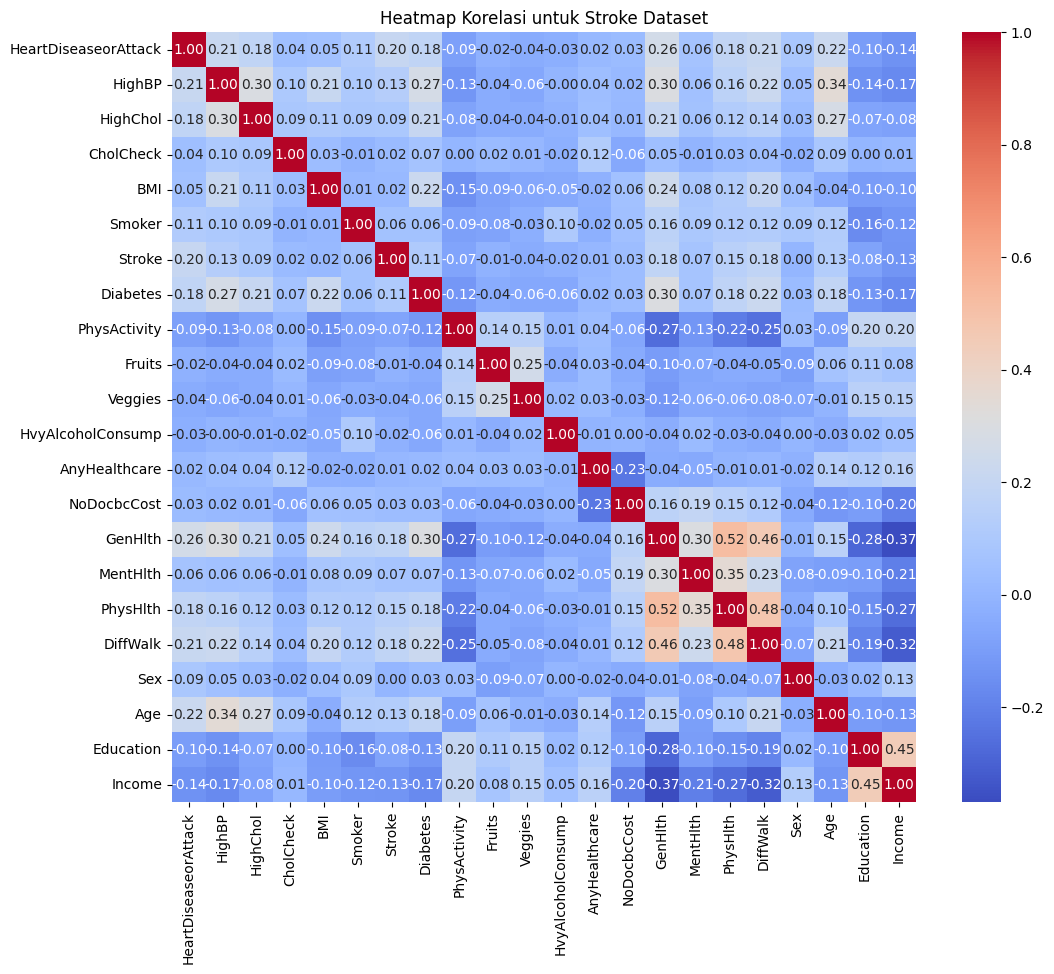

In [ ]:
# Contoh visualisasi distribusi IMT dari dataset stroke
plt.figure(figsize=(8, 6))
sns.histplot(df_heart['BMI'].dropna(), kde=True)
plt.title('Distribusi BMI di Dataset Stroke')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Stroke Dataset')
plt.show()

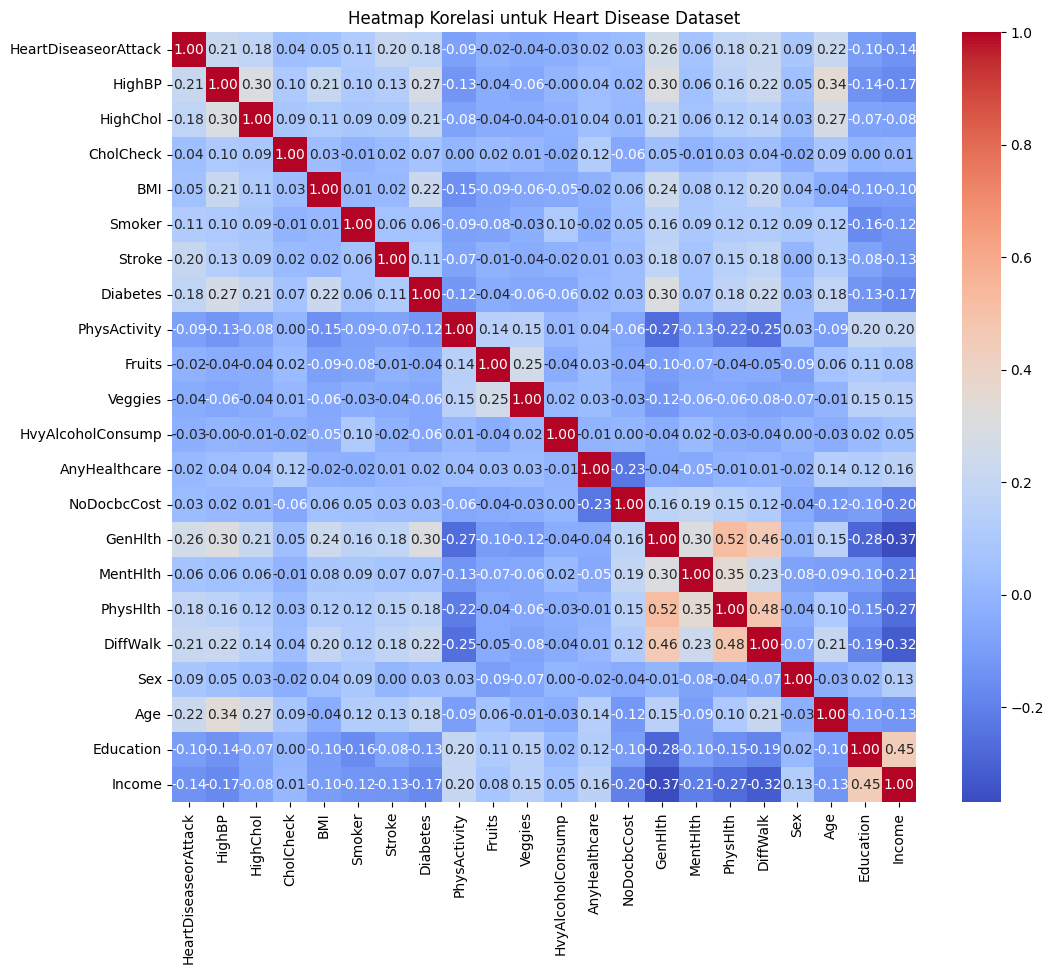

In [ ]:
# Visualisasi korelasi di dataset jantung
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Heart Disease Dataset')
plt.show()

# Set Nama Kolom dan Value Diabetes

In [ ]:
# Rename kolom target untuk kejelasan dan konsistensi
df_heart = df_heart.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})

In [ ]:
# Pilih fitur umum yang akan digunakan dan harmonisasikan nama kolom
# Ini adalah contoh, Anda mungkin perlu menyesuaikannya berdasarkan EDA Anda
common_features = [
    'Age', 'Sex', 'BMI', 'SmokingStatus', 'Hypertension', 'HeartDisease',
    'Glucose'
] # Ini harus diverifikasi lagi dengan kolom asli dari setiap dataset!

# Perbaiki nama kolom yang berbeda antar dataset (contoh)
df_heart = df_heart.rename(columns={
    'Age': 'Age', 'Sex': 'Gender', 'BMI': 'BMI', 'Smoker': 'SmokingStatus',
    'HighBP': 'Hypertension'
})

In [ ]:
df_heart['Diabetes'] = df_heart['Diabetes'].map({0:0, 2: 1})

In [ ]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Penanganan Data Imbalance

## SMOTEN

In [ ]:
# Asumsi: Anda sudah memiliki DataFrame Anda bernama 'df'

dataframe = df_heart.copy()
cols_to_convert_to_int = target_columns
print(f"\nKolom yang akan diubah ke 'integer': {cols_to_convert_to_int}")

# --- Lakukan perubahan tipe data ---
for col in cols_to_convert_to_int:
    dataframe[col] = dataframe[col].astype('int')

print("\nX Info:", dataframe.info())
dataframe


Kolom yang akan diubah ke 'integer': ['HeartDisease', 'Stroke', 'Diabetes']
<class 'pandas.core.frame.DataFrame'>
Index: 249049 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HeartDisease       249049 non-null  int64  
 1   Hypertension       249049 non-null  float64
 2   HighChol           249049 non-null  float64
 3   CholCheck          249049 non-null  float64
 4   BMI                249049 non-null  float64
 5   SmokingStatus      249049 non-null  float64
 6   Stroke             249049 non-null  int64  
 7   Diabetes           249049 non-null  int64  
 8   PhysActivity       249049 non-null  float64
 9   Fruits             249049 non-null  float64
 10  Veggies            249049 non-null  float64
 11  HvyAlcoholConsump  249049 non-null  float64
 12  AnyHealthcare      249049 non-null  float64
 13  NoDocbcCost        249049 non-null  float64
 14  GenHlth            249049 no

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1.0,1.0,1.0,45.0,0.0,0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0,1.0,1.0,1.0,18.0,0.0,0,1,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0,0.0,0.0,1.0,28.0,0.0,0,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0,1.0,0.0,1.0,23.0,0.0,0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
print("Shape DataFrame Awal:", dataframe.shape)
print("\nDistribusi Variabel Target Awal:")
print(dataframe[['HeartDisease', 'Stroke', 'Diabetes']].apply(pd.Series.value_counts))

# --- 2. Menggabungkan 3 Variabel Target menjadi 1 Variabel 8 Kelas ---

# Membuat string kombinasi dari 3 target
# Contoh: '000', '001', '010', '011', '100', '101', '110', '111'
dataframe['combined_target'] = dataframe['HeartDisease'].astype(str) + \
                        dataframe['Stroke'].astype(str) + \
                        dataframe['Diabetes'].astype(str)

# Untuk SMOTE, variabel target (y) harus berupa integer atau numerik.
# Kita perlu mengonversi string kombinasi menjadi nilai numerik.
# Salah satu caranya adalah dengan menganggapnya sebagai bilangan biner, lalu mengonversinya ke desimal.
# '000' -> 0, '001' -> 1, '010' -> 2, ..., '111' -> 7
dataframe['combined_target_numeric'] = dataframe['combined_target'].apply(lambda x: int(x, 2))


# Mengubah string kombinasi menjadi nilai numerik/kategorikal
# Kita bisa mapping string ini ke integer 0-7, atau biarkan sebagai string
# Untuk SMOTEN, lebih baik jika target adalah integer atau string kategorikal
# Biarkan sebagai string untuk kemudahan representasi dan SMOTEN dapat menanganinya.

print("\nDistribusi 'combined_target_numeric' sebelum balancing:")
print(dataframe['combined_target_numeric'].value_counts())

# Memisahkan fitur (X) dan target (y)
X = dataframe.drop(['HeartDisease', 'Stroke', 'Diabetes', 'combined_target', 'combined_target_numeric'], axis=1)
y = dataframe['combined_target_numeric']

Shape DataFrame Awal: (249049, 22)

Distribusi Variabel Target Awal:
   HeartDisease  Stroke  Diabetes
0        225820  239022    213703
1         23229   10027     35346

Distribusi 'combined_target_numeric' sebelum balancing:
combined_target_numeric
0    193793
1     25836
4     13151
5      6242
2      4559
6      2200
7      1636
3      1632
Name: count, dtype: int64


In [ ]:
# --- 3. Melakukan Prosedur Balancing Data ---

# Inisialisasi SMOTEN (untuk data dengan fitur dan target kategorikal/campuran)
# Jika fitur Anda hanya numerik, Anda bisa pakai SMOTE atau ADASYN.
# Jika fitur Anda campuran (numerik dan kategorikal), SMOTENC atau SMOTEN lebih cocok.
# SMOTEN secara spesifik cocok untuk dataset di mana fitur dan target bisa berupa kategorikal.
smoten = SMOTEN(random_state=42) # random_state untuk reproduktifitas

print(f"\nJumlah sampel per kelas sebelum balancing: {Counter(y)}")

X_resampled, y_resampled = smoten.fit_resample(X, y)

print(f"Jumlah sampel per kelas setelah balancing: {Counter(y_resampled)}")
print(f"Shape X_resampled setelah balancing: {X_resampled.shape}")

# Menggabungkan kembali X_resampled dan y_resampled menjadi DataFrame baru
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['combined_target_numeric'] = y_resampled

print("\nShape DataFrame setelah balancing:", df_balanced.shape)

# --- 4. Mengubah Format Variabel Target Kembali Menjadi 3 Variabel Target Semula ---

# Mengonversi kembali 'combined_target_numeric' ke string biner 3 digit
# Misalnya, 0 -> '000', 1 -> '001', ..., 7 -> '111'
df_balanced['combined_target_str'] = df_balanced['combined_target_numeric'].apply(lambda x: format(x, '03b'))

# Memisahkan 'combined_target' menjadi 3 kolom target asli
df_balanced['HeartDisease'] = df_balanced['combined_target_str'].str[0].astype(int)
df_balanced['Stroke'] = df_balanced['combined_target_str'].str[1].astype(int)
df_balanced['Diabetes'] = df_balanced['combined_target_str'].str[2].astype(int)

# Opsional: Hapus kolom 'combined_target_numeric' dan 'combined_target_str' jika tidak diperlukan lagi
df_balanced = df_balanced.drop(['combined_target_numeric', 'combined_target_str'], axis=1)

print("\nDistribusi Variabel Target Setelah Resampling dan Pemisahan:")
print(df_balanced[['HeartDisease', 'Stroke', 'Diabetes']].apply(pd.Series.value_counts))

print("\nDataFrame Akhir setelah balancing dan pemisahan kembali (beberapa baris pertama):")
print(df_balanced.head())


Jumlah sampel per kelas sebelum balancing: Counter({0: 193793, 1: 25836, 4: 13151, 5: 6242, 2: 4559, 6: 2200, 7: 1636, 3: 1632})


In [ ]:
file_path = "/content/drive/My Drive/Capstone LaskarAI/Data SMOTEN.csv"  # Nama file output
df_balanced.to_csv(file_path, index=True)  # index=False agar indeks tidak disertakan dalam file Excel

## Pra Pemrosesan Balancing Data

In [ ]:
# df_balanced = pd.read_csv('/content/drive/My Drive/Capstone LaskarAI/Data_SMOTEN.csv')
df_balanced = pd.read_csv('/content/drive/My Drive/Capstone LaskarAI/Data_SMOTEN2.csv') #Tanpa Variabel Gula Darah

# atau upload file nya
# df_balanced = pd.read_csv('Data SMOTEN.csv')
df_balanced.drop(columns=['Unnamed: 0'], inplace=True)
df_balanced

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,HeartDisease,Stroke,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,...,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,...,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0,0,0
3,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0,0,0
4,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550339,1.0,0.0,1.0,43.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,10.0,4.0,6.0,1,1,1
1550340,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,9.0,4.0,8.0,1,1,1
1550341,1.0,1.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,7.0,1.0,0.0,10.0,6.0,2.0,1,1,1
1550342,1.0,1.0,1.0,31.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,9.0,4.0,1.0,1,1,1


In [ ]:
print("\nDistribusi Variabel Target Setelah Resampling dan Pemisahan:")
print(df_balanced[['HeartDisease', 'Stroke', 'Diabetes']].apply(pd.Series.value_counts))



Distribusi Variabel Target Setelah Resampling dan Pemisahan:
   HeartDisease  Stroke  Diabetes
0        775172  775172    775172
1        775172  775172    775172


In [ ]:
df_balanced.describe()

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,HeartDisease,Stroke,Diabetes
count,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,...,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1.550344e+06,1550344.0,1550344.0,1550344.0
mean,7.129514e-01,6.431747e-01,9.925204e-01,2.865789e+01,5.586663e-01,6.279413e-01,5.666807e-01,7.976230e-01,1.064602e-02,9.886135e-01,...,3.070994e+00,9.009032e+00,4.229964e-01,4.151859e-01,9.557162e+00,4.692791e+00,4.925457e+00,0.5,0.5,0.5
std,4.523846e-01,4.790628e-01,8.616084e-02,5.704718e+00,4.965465e-01,4.833541e-01,4.955339e-01,4.017719e-01,1.026289e-01,1.060984e-01,...,8.490758e+00,1.273728e+01,4.940350e-01,4.927542e-01,2.368080e+00,9.902629e-01,2.247310e+00,0.5,0.5,0.5
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0
25%,0.000000e+00,0.000000e+00,1.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,4.000000e+00,3.000000e+00,0.0,0.0,0.0
50%,1.000000e+00,1.000000e+00,1.000000e+00,2.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,5.000000e+00,0.5,0.5,0.5
75%,1.000000e+00,1.000000e+00,1.000000e+00,3.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.100000e+01,6.000000e+00,7.000000e+00,1.0,1.0,1.0
max,1.000000e+00,1.000000e+00,1.000000e+00,9.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+01,3.000000e+01,1.000000e+00,1.000000e+00,1.300000e+01,6.000000e+00,8.000000e+00,1.0,1.0,1.0


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550344 entries, 0 to 1550343
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Hypertension       1550344 non-null  float64
 1   HighChol           1550344 non-null  float64
 2   CholCheck          1550344 non-null  float64
 3   BMI                1550344 non-null  float64
 4   SmokingStatus      1550344 non-null  float64
 5   PhysActivity       1550344 non-null  float64
 6   Fruits             1550344 non-null  float64
 7   Veggies            1550344 non-null  float64
 8   HvyAlcoholConsump  1550344 non-null  float64
 9   AnyHealthcare      1550344 non-null  float64
 10  NoDocbcCost        1550344 non-null  float64
 11  GenHlth            1550344 non-null  float64
 12  MentHlth           1550344 non-null  float64
 13  PhysHlth           1550344 non-null  float64
 14  DiffWalk           1550344 non-null  float64
 15  Gender             1550344 non-n

In [ ]:
df = df_balanced.copy()
numeric_cols_to_round = [col for col in df.select_dtypes(include=np.number).columns]
# Bulatkan kolom numerik yang terpilih menjadi 0 angka desimal
for col in numeric_cols_to_round:
    df[col] = df[col].round(0).astype(int) # Perubahan di sini: .round(0)

print("\nDataFrame setelah pembulatan menjadi 0 angka desimal:")
df.info()


DataFrame setelah pembulatan menjadi 0 angka desimal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550344 entries, 0 to 1550343
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Hypertension       1550344 non-null  int64
 1   HighChol           1550344 non-null  int64
 2   CholCheck          1550344 non-null  int64
 3   BMI                1550344 non-null  int64
 4   SmokingStatus      1550344 non-null  int64
 5   PhysActivity       1550344 non-null  int64
 6   Fruits             1550344 non-null  int64
 7   Veggies            1550344 non-null  int64
 8   HvyAlcoholConsump  1550344 non-null  int64
 9   AnyHealthcare      1550344 non-null  int64
 10  NoDocbcCost        1550344 non-null  int64
 11  GenHlth            1550344 non-null  int64
 12  MentHlth           1550344 non-null  int64
 13  PhysHlth           1550344 non-null  int64
 14  DiffWalk           1550344 non-null  int64
 15  Gender     

In [ ]:
# Saring kolom yang dikecualikan
cols_to_convert_to_cat = ['GenHlth', 'Education', 'Income']
print(f"\nKolom yang akan diubah ke 'category': {cols_to_convert_to_cat}")

# --- Lakukan perubahan tipe data ---
for col in cols_to_convert_to_cat:
    df[col] = df[col].astype('category')

print("\ndf Info:", df.info())
df


Kolom yang akan diubah ke 'category': ['GenHlth', 'Education', 'Income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550344 entries, 0 to 1550343
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Hypertension       1550344 non-null  int64   
 1   HighChol           1550344 non-null  int64   
 2   CholCheck          1550344 non-null  int64   
 3   BMI                1550344 non-null  int64   
 4   SmokingStatus      1550344 non-null  int64   
 5   PhysActivity       1550344 non-null  int64   
 6   Fruits             1550344 non-null  int64   
 7   Veggies            1550344 non-null  int64   
 8   HvyAlcoholConsump  1550344 non-null  int64   
 9   AnyHealthcare      1550344 non-null  int64   
 10  NoDocbcCost        1550344 non-null  int64   
 11  GenHlth            1550344 non-null  category
 12  MentHlth           1550344 non-null  int64   
 13  PhysHlth           1550344 non-null  int64 

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,HeartDisease,Stroke,Diabetes
0,1,1,1,40,1,0,0,1,0,1,...,18,15,1,0,9,4,3,0,0,0
1,0,0,0,25,1,1,0,0,0,0,...,0,0,0,0,7,6,1,0,0,0
2,1,1,1,28,0,0,1,0,0,1,...,30,30,1,0,9,4,8,0,0,0
3,1,0,1,27,0,1,1,1,0,1,...,0,0,0,0,11,3,6,0,0,0
4,1,1,1,24,0,1,1,1,0,1,...,3,0,0,0,11,5,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550339,1,0,1,43,1,1,1,1,0,1,...,0,0,0,1,10,4,6,1,1,1
1550340,1,1,1,28,0,0,0,0,0,1,...,0,0,0,1,9,4,8,1,1,1
1550341,1,1,1,23,0,0,1,1,0,1,...,0,7,1,0,10,6,2,1,1,1
1550342,1,1,1,31,0,1,0,1,0,1,...,0,0,0,1,9,4,1,1,1,1


In [ ]:
onehot_cols = ['GenHlth', 'Education', 'Income']

# 2. One-hot encoding untuk kolom kategorikal dengan unique > 2
df_encode = pd.get_dummies(df, columns=onehot_cols, drop_first=False).astype(int)
df_encode

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1,1,1,40,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,25,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,1,1,28,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,27,0,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,24,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550339,1,0,1,43,1,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1550340,1,1,1,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1550341,1,1,1,23,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,0
1550342,1,1,1,31,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,HeartDisease,Stroke,Diabetes
0,1,1,1,40,1,0,0,1,0,1,...,18,15,1,0,9,4,3,0,0,0
1,0,0,0,25,1,1,0,0,0,0,...,0,0,0,0,7,6,1,0,0,0
2,1,1,1,28,0,0,1,0,0,1,...,30,30,1,0,9,4,8,0,0,0
3,1,0,1,27,0,1,1,1,0,1,...,0,0,0,0,11,3,6,0,0,0
4,1,1,1,24,0,1,1,1,0,1,...,3,0,0,0,11,5,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550339,1,0,1,43,1,1,1,1,0,1,...,0,0,0,1,10,4,6,1,1,1
1550340,1,1,1,28,0,0,0,0,0,1,...,0,0,0,1,9,4,8,1,1,1
1550341,1,1,1,23,0,0,1,1,0,1,...,0,7,1,0,10,6,2,1,1,1
1550342,1,1,1,31,0,1,0,1,0,1,...,0,0,0,1,9,4,1,1,1,1


In [ ]:
target_columns = ['HeartDisease', 'Stroke', 'Diabetes']
X = df_encode.drop(columns=target_columns)
y = df_encode[target_columns]

In [ ]:
#TARGET_COLUMNS = ['HeartDisease', 'Stroke', 'Diabetes']
target_columns = ['HeartDisease', 'Stroke', 'Diabetes']
features = [col for col in df_encode.columns if col not in target_columns + ['stratify_label']] # Tambahkan 'stratify_label' agar tidak jadi fitur

# --- Stratifikasi Kustom untuk Multi-Label ---
df_encode['stratify_label'] = df_encode[target_columns].astype(str).agg(''.join, axis=1)

# --- 3. Split Data into Training and Testing Sets ---
train_df, test_df = train_test_split(
    df_encode, test_size=0.2, random_state=42,
    stratify=df_encode['stratify_label']
)

# Hapus kolom 'stratify_label' dari DataFrame training dan testing
train_df = train_df.drop(columns=['stratify_label'])
test_df = test_df.drop(columns=['stratify_label'])

In [ ]:
df_encode

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,stratify_label
0,1,1,1,40,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,000
1,0,0,0,25,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,000
2,1,1,1,28,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,000
3,1,0,1,27,0,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,000
4,1,1,1,24,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550339,1,0,1,43,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,111
1550340,1,1,1,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,111
1550341,1,1,1,23,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,111
1550342,1,1,1,31,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,111


In [ ]:
# Identifikasi kolom numerik yang perlu di-scaling (misalnya, 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime')
# Jangan scaling kolom yang sudah kategorikal atau biner

numerical_features = ['BMI', 'PhysHlth', 'MentHlth', 'Age'] # Contoh, sesuaikan dengan kolom X Anda
scaler = StandardScaler()

# Terapkan scaling HANYA pada fitur numerik di data training dan testing
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Simpan scaler
joblib.dump(scaler, '/content/drive/My Drive/Capstone LaskarAI/scaler.pkl')
print("Scaler saved to scaler.pkl")

Scaler saved to scaler.pkl


In [ ]:
X_train = train_df.drop(columns=target_columns)
y_train = train_df[target_columns]

X_test = test_df.drop(columns=target_columns)
y_test = test_df[target_columns]

In [ ]:
print("\nDistribusi Variabel Target Train:")
print(y_train[['HeartDisease', 'Stroke', 'Diabetes']].apply(pd.Series.value_counts))
print("\nDistribusi Variabel Target Test:")
print(y_test[['HeartDisease', 'Stroke', 'Diabetes']].apply(pd.Series.value_counts))


Distribusi Variabel Target Train:
   HeartDisease  Stroke  Diabetes
0        620138  620139    620137
1        620137  620136    620138

Distribusi Variabel Target Test:
   HeartDisease  Stroke  Diabetes
0        155034  155033    155035
1        155035  155036    155034


In [ ]:
print(X_train.info(), y_train.info(), X_test.info(), y_test.info(),)

<class 'pandas.core.frame.DataFrame'>
Index: 1240275 entries, 361758 to 923813
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Hypertension       1240275 non-null  int64  
 1   HighChol           1240275 non-null  int64  
 2   CholCheck          1240275 non-null  int64  
 3   BMI                1240275 non-null  float64
 4   SmokingStatus      1240275 non-null  int64  
 5   PhysActivity       1240275 non-null  int64  
 6   Fruits             1240275 non-null  int64  
 7   Veggies            1240275 non-null  int64  
 8   HvyAlcoholConsump  1240275 non-null  int64  
 9   AnyHealthcare      1240275 non-null  int64  
 10  NoDocbcCost        1240275 non-null  int64  
 11  MentHlth           1240275 non-null  float64
 12  PhysHlth           1240275 non-null  float64
 13  DiffWalk           1240275 non-null  int64  
 14  Gender             1240275 non-null  int64  
 15  Age                1240275 non-nu

# Pembangunan Model Multi-output Neural Network

## Pre-Processing Data

In [ ]:
print(X_train.info(), y_train.info(), X_test.info(), y_test.info(),)

<class 'pandas.core.frame.DataFrame'>
Index: 1240275 entries, 361758 to 923813
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Hypertension       1240275 non-null  int64  
 1   HighChol           1240275 non-null  int64  
 2   CholCheck          1240275 non-null  int64  
 3   BMI                1240275 non-null  float64
 4   SmokingStatus      1240275 non-null  int64  
 5   PhysActivity       1240275 non-null  int64  
 6   Fruits             1240275 non-null  int64  
 7   Veggies            1240275 non-null  int64  
 8   HvyAlcoholConsump  1240275 non-null  int64  
 9   AnyHealthcare      1240275 non-null  int64  
 10  NoDocbcCost        1240275 non-null  int64  
 11  MentHlth           1240275 non-null  float64
 12  PhysHlth           1240275 non-null  float64
 13  DiffWalk           1240275 non-null  int64  
 14  Gender             1240275 non-null  int64  
 15  Age                1240275 non-nu

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hypertension,1240275.0,7.128629e-01,0.452426,0.000000,0.000000,1.000000,1.000000,1.000000
HighChol,1240275.0,6.430542e-01,0.479099,0.000000,0.000000,1.000000,1.000000,1.000000
CholCheck,1240275.0,9.925597e-01,0.085936,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,1240275.0,-1.902142e-16,1.000000,-2.919944,-0.641713,-0.115967,0.585027,12.151433
SmokingStatus,1240275.0,5.587616e-01,0.496535,0.000000,0.000000,1.000000,1.000000,1.000000
PhysActivity,1240275.0,6.279511e-01,0.483352,0.000000,0.000000,1.000000,1.000000,1.000000
Fruits,1240275.0,5.666985e-01,0.495532,0.000000,0.000000,1.000000,1.000000,1.000000
Veggies,1240275.0,7.977457e-01,0.401681,0.000000,1.000000,1.000000,1.000000,1.000000
HvyAlcoholConsump,1240275.0,1.062506e-02,0.102529,0.000000,0.000000,0.000000,0.000000,1.000000
AnyHealthcare,1240275.0,9.886041e-01,0.106141,0.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# --- Preprocessing Data ---

targets = ['HeartDisease', 'Stroke', 'Diabetes']
print(f"Target Columns: {list(targets)}")

# Terapkan preprocessing pada X
# Pastikan X_train dan X_test sudah diskalakan dan di-encode dengan benar
X_train_processed = X_train.to_numpy()
X_test_processed = X_test.to_numpy()

# One-hot encode target variables (TIDAK diperlukan untuk BinaryCrossentropy dengan 1 neuron output)
# Karena Anda menggunakan Dense(1, activation='sigmoid') untuk setiap output,
# target harus dalam format (n_samples, 1) dengan nilai 0 atau 1, BUKAN one-hot encoded.
# Jika y_train/y_test adalah DataFrame dengan kolom 0/1, ini sudah tepat.
y_train_list = [y_train[target_col].values.reshape(-1, 1) for target_col in targets]
y_test_list = [y_test[target_col].values.reshape(-1, 1) for target_col in targets]

# Jumlah kelas per target, ini selalu 1 untuk Binary Classification (1 neuron sigmoid output)
num_classes_per_target = [1] * len(targets) # Pastikan ini disetel dengan benar

# Now y_train_list and y_test_list are lists of arrays with consistent sample numbers

Target Columns: ['HeartDisease', 'Stroke', 'Diabetes']


In [ ]:
X_train_processed.shape

(1240275, 35)

## Set Up & Train Model

In [ ]:
# Hyperparameters from the table
num_hidden_layers = 2  # Based on your "Best Value So Far"
units_layer_0 = 192
dropout_rate_layer_0 = 0.2
units_layer_1 = 256
dropout_rate_layer_1 = 0.3
learning_rate = 0.001
units_layer_2 = 224
dropout_rate_layer_2 = 0.4
epochs = 100  # "tuner/epochs"
initial_epoch = 10  # "tuner/initial_epoch"

# --- Definisikan Input Layer ---
input_shape = X_train_processed.shape[1]
input_layer = Input(shape=(input_shape,), name='input_features')

# --- Hidden Layers with Dropout ---
x = Dense(units_layer_0, activation='relu')(input_layer)  # Layer 0
x = Dropout(dropout_rate_layer_0)(x)  # Dropout for Layer 0
x = Dense(units_layer_1, activation='relu')(x)  # Layer 1
x = Dropout(dropout_rate_layer_1)(x)  # Dropout for Layer 1
x = Dense(units_layer_2, activation='relu')(x)  # Layer 2
x = Dropout(dropout_rate_layer_2)(x)  # Dropout for Layer 2

# --- Hidden Layers dengan Dropout ---
x = Dense(256, activation='relu')(input_layer)
x = Dropout(0.3)(x) # Dropout dengan probabilitas 30%
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# --- Output Layers untuk Setiap Target ---
output_layers = []
for i, target_name in enumerate(targets): # Gunakan target_name dari list 'targets'
    # Setiap output adalah klasifikasi biner, jadi 1 neuron dengan sigmoid
    output_layer = Dense(1, activation='sigmoid', name=f'output_{target_name}')(x)
    output_layers.append(output_layer)

# --- Buat Model ---
model = Model(inputs=input_layer, outputs=output_layers)

# --- Compile Model ---
losses = {f'output_{target_name}': BinaryCrossentropy() for target_name in targets}
metrics = {f'output_{target_name}': [BinaryAccuracy(name=f'accuracy_{target_name}'),
                                     AUC(name=f'auc_{target_name}')] # Tambahkan AUC di sini
           for target_name in targets}

# --- Compile Model ---
#losses = {f'output_target_{i+1}': BinaryCrossentropy() for i in range(len(targets))}
#metrics = {f'output_target_{i+1}': BinaryAccuracy(name=f'accuracy_target_{i+1}') for i in range(len(targets))}

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=losses,
              metrics=metrics)

model.summary()

# --- Callback Early Stopping ---
# Monitor 'val_loss' (loss pada data validasi)
# patience=10 berarti akan berhenti jika val_loss tidak membaik selama 10 epoch berturut-turut
# restore_best_weights=True akan mengembalikan bobot model dari epoch terbaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# --- Format y_train_list dan y_test_list untuk feed ke model (sesuai nama output layer) ---
y_train_dict = {f'output_{target_name}': y_train_list[i] for i, target_name in enumerate(targets)}
y_test_dict = {f'output_{target_name}': y_test_list[i] for i, target_name in enumerate(targets)}

# --- Latih Model ---
history = model.fit(X_train_processed, y_train_dict,
                    epochs=epochs,  # Use the 'tuner/epochs' value
                    initial_epoch=initial_epoch,  # Use 'tuner/initial_epoch' value
                    batch_size=32,
                    validation_data=(X_test_processed, y_test_dict),
                    callbacks=[early_stopping],  # Include EarlyStopping callback
                    verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │      9,216 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_HeartDisease │ (None, 1)         │         65 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_Stroke       │ (None, 1)         │         65 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_Diabetes     │ (None, 1)         │         65 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,563 (197.51 KB)

 Trainable params: 50,563 (197.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 11/100
38759/38759 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - loss: 1.7167 - output_Diabetes_accuracy_Diabetes: 0.7064 - output_Diabetes_auc_Diabetes: 0.7809 - output_Diabetes_loss: 0.5587 - output_HeartDisease_accuracy_HeartDisease: 0.6995 - output_HeartDisease_auc_HeartDisease: 0.7707 - output_HeartDisease_loss: 0.5690 - output_Stroke_accuracy_Stroke: 0.6818 - output_Stroke_auc_Stroke: 0.7469 - output_Stroke_loss: 0.5890 - val_loss: 1.4418 - val_output_Diabetes_accuracy_Diabetes: 0.7745 - val_output_Diabetes_auc_Diabetes: 0.8604 - val_output_Diabetes_loss: 0.4724 - val_output_HeartDisease_accuracy_HeartDisease: 0.7752 - val_output_HeartDisease_auc_HeartDisease: 0.8577 - val_output_HeartDisease_loss: 0.4759 - val_output_Stroke_accuracy_Stroke: 0.7656 - val_output_Stroke_auc_Stroke: 0.8480 - val_output_Stroke_loss: 0.4935
Epoch 12/100
38759/38759 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - loss: 1.5472 - output_Diabetes_accuracy_Diabetes: 0.7487 - output_Diabetes_auc_Diabetes: 0.8302 - output

## Save Model

In [ ]:
# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5.keras")

# Simpan model format TFLite
converter4 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5")
tflite_model4 = converter4.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/mnn5.tflite", "wb") as f:
    f.write(tflite_model4)

# Simpan History Model
with open("/content/drive/My Drive/Capstone LaskarAI/mnn5.pkl", "wb") as f:
    pickle.dump(history, f)

# Simpan model format tensorflow.js
tfjs4_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/mnn5"
tfjs.converters.save_keras_model(model, tfjs4_path)
print("TensorFlow.js model saved successfully")

Saved artifact at '/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 35), dtype=tf.float32, name='input_features')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  135725283013648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283015568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283016336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283010192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283004432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283003280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283005776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725283000784: TensorSpec(shape=(), dtype=tf.resource, name=None)

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved successfully


## Model Evaluation

In [ ]:
model = load_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn5.h5")


=== Evaluasi Model pada Data Uji ===
Total Loss (Test): 1.0607
  Target HeartDisease Loss (Test): 0.3675
  Target HeartDisease Accuracy (Test): 0.3295
  Target HeartDisease AUC (Test): 0.3637
  Target Stroke Loss (Test): 0.8415
  Target Stroke Accuracy (Test): 0.9248
  Target Stroke AUC (Test): 0.8407
  Target Diabetes Loss (Test): 0.9231
  Target Diabetes Accuracy (Test): 0.8728
  Target Diabetes AUC (Test): 0.9449
38759/38759 ━━━━━━━━━━━━━━━━━━━━ 35s 909us/step
9690/9690 ━━━━━━━━━━━━━━━━━━━━ 9s 907us/step

--- Metrik Evaluasi untuk Target: HeartDisease ---
Distribusi Kelas Sebenarnya untuk HeartDisease di Data Uji:
0    155034
1    155035
Name: count, dtype: int64

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84    155034
           1       0.82      0.87      0.84    155035

    accuracy                           0.84    310069
   macro avg       0.84      0.84      0.84    310069
weighted avg  

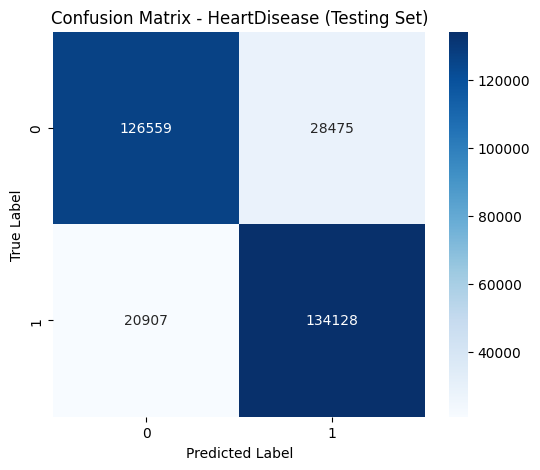

ROC AUC Score untuk HeartDisease (Training Set): 0.9245
ROC AUC Score untuk HeartDisease (Testing Set): 0.9231


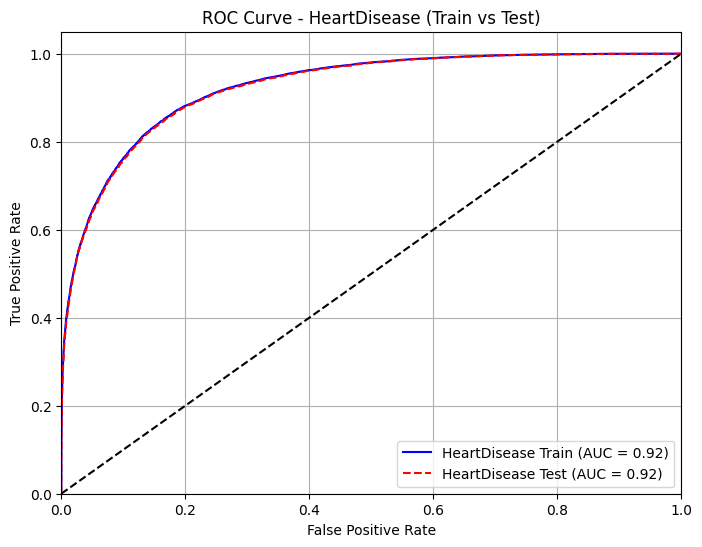

Akurasi untuk HeartDisease (Testing Set): 0.8407

--- Metrik Evaluasi untuk Target: Stroke ---
Distribusi Kelas Sebenarnya untuk Stroke di Data Uji:
0    155033
1    155036
Name: count, dtype: int64

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88    155033
           1       0.89      0.85      0.87    155036

    accuracy                           0.87    310069
   macro avg       0.87      0.87      0.87    310069
weighted avg       0.87      0.87      0.87    310069



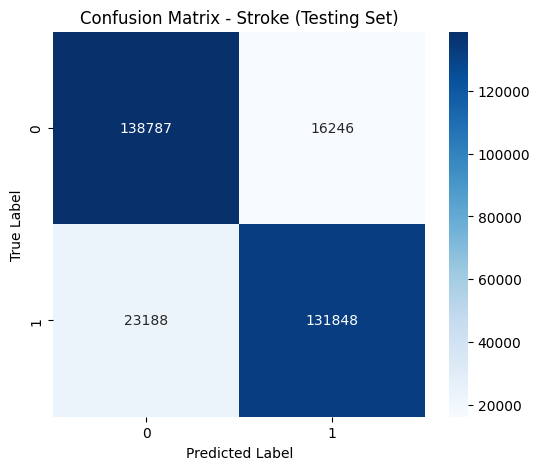

ROC AUC Score untuk Stroke (Training Set): 0.9469
ROC AUC Score untuk Stroke (Testing Set): 0.9449


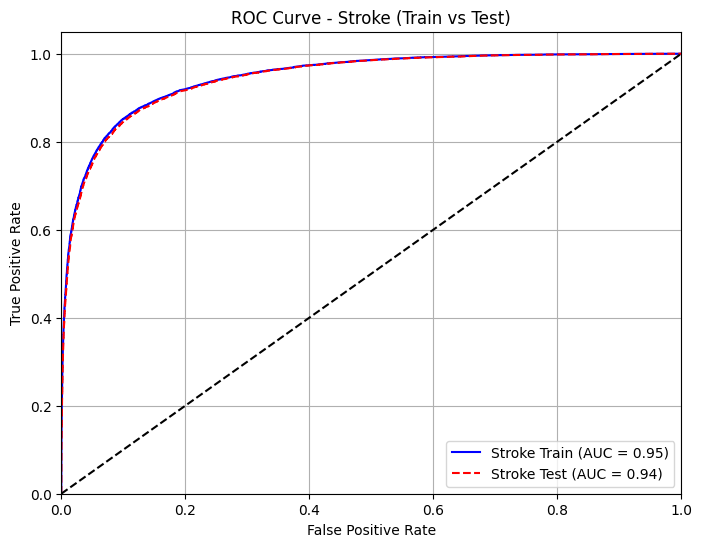

Akurasi untuk Stroke (Testing Set): 0.8728

--- Metrik Evaluasi untuk Target: Diabetes ---
Distribusi Kelas Sebenarnya untuk Diabetes di Data Uji:
0    155035
1    155034
Name: count, dtype: int64

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84    155035
           1       0.84      0.85      0.84    155034

    accuracy                           0.84    310069
   macro avg       0.84      0.84      0.84    310069
weighted avg       0.84      0.84      0.84    310069



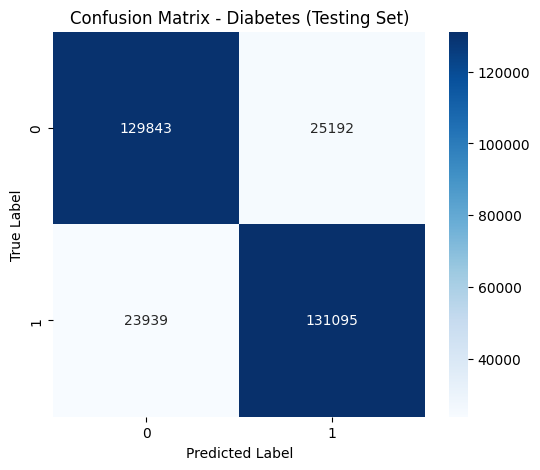

ROC AUC Score untuk Diabetes (Training Set): 0.9259
ROC AUC Score untuk Diabetes (Testing Set): 0.9248


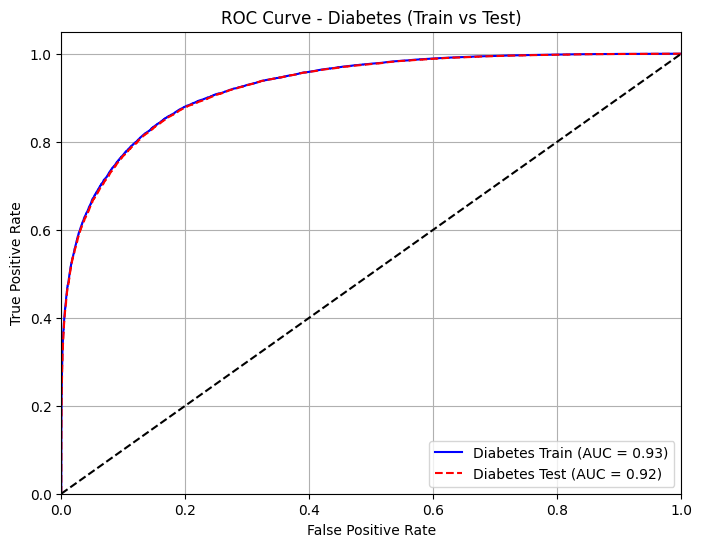

Akurasi untuk Diabetes (Testing Set): 0.8415


In [ ]:
# --- Evaluasi Model pada Data Uji ---
print("\n=== Evaluasi Model pada Data Uji ===")
evaluation_results = model.evaluate(X_test_processed, y_test_dict, verbose=0)

# Cetak metrik untuk setiap output
# Urutan: [total_loss, loss_target1, accuracy_target1, auc_target1, loss_target2, accuracy_target2, auc_target2, ...]
print(f"Total Loss (Test): {evaluation_results[0]:.4f}")
metric_idx = 1 # Mulai dari indeks 1 karena index 0 adalah total_loss
for i, target_col in enumerate(targets):
    print(f"  Target {target_col} Loss (Test): {evaluation_results[metric_idx]:.4f}")
    print(f"  Target {target_col} Accuracy (Test): {evaluation_results[metric_idx + 1]:.4f}")
    print(f"  Target {target_col} AUC (Test): {evaluation_results[metric_idx + 2]:.4f}")
    metric_idx += 3 # Ada 3 metrik (loss, accuracy, auc) per target


# --- Membuat Prediksi untuk TRAIN dan TEST ---
predictions_prob_train = model.predict(X_train_processed)
predictions_prob_test = model.predict(X_test_processed)


# --- Evaluasi Detail per Target Output (Termasuk ROC Train vs Test) ---
for i, target_col in enumerate(targets):
    print(f"\n--- Metrik Evaluasi untuk Target: {target_col} ---")

    # Ambil probabilitas prediksi untuk target ini (Train dan Test)
    pred_prob_train_target = predictions_prob_train[i].flatten()
    pred_prob_test_target = predictions_prob_test[i].flatten()

    # Ambil kelas sebenarnya (Train dan Test)
    true_classes_train = y_train_dict[f'output_{target_col}'].flatten().astype(int)
    true_classes_test = y_test_dict[f'output_{target_col}'].flatten().astype(int)


    # --- Cek Ketidakseimbangan Kelas di Data Uji (dan Train) ---
    unique_true_classes_test = np.unique(true_classes_test)
    class_counts_test = pd.Series(true_classes_test).value_counts().sort_index()
    print(f"Distribusi Kelas Sebenarnya untuk {target_col} di Data Uji:\n{class_counts_test}")

    if len(unique_true_classes_test) < 2:
        print(f"  !!! PERINGATAN: Hanya satu kelas yang ada di data uji untuk {target_col}. Metrik akan menyesatkan atau tidak terdefinisi. !!!")
        print(f"  Silakan pastikan data pengujian Anda memiliki kedua kelas (0 dan 1) untuk target ini.")
        continue # Skip sisa evaluasi untuk target ini jika hanya ada satu kelas

    # Konversi probabilitas prediksi ke kelas biner (0 atau 1) untuk test set
    predicted_classes_test = (pred_prob_test_target > 0.5).astype(int)

    # Classification Report
    print("\nClassification Report (Testing Set):")
    target_names_test = [str(cls) for cls in sorted(unique_true_classes_test)]
    print(classification_report(true_classes_test, predicted_classes_test, target_names=target_names_test, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(true_classes_test, predicted_classes_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_test,
                yticklabels=target_names_test)
    plt.title(f'Confusion Matrix - {target_col} (Testing Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC AUC (Untuk target biner - Train dan Test)
    try:
        auc_score_train = roc_auc_score(true_classes_train, pred_prob_train_target)
        auc_score_test = roc_auc_score(true_classes_test, pred_prob_test_target)
        print(f"ROC AUC Score untuk {target_col} (Training Set): {auc_score_train:.4f}")
        print(f"ROC AUC Score untuk {target_col} (Testing Set): {auc_score_test:.4f}")

        # Plot ROC Curve (Train vs Test)
        fpr_train, tpr_train, _ = roc_curve(true_classes_train, pred_prob_train_target)
        fpr_test, tpr_test, _ = roc_curve(true_classes_test, pred_prob_test_target)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, label=f'{target_col} Train (AUC = {auc_score_train:.2f})', color='blue')
        plt.plot(fpr_test, tpr_test, label=f'{target_col} Test (AUC = {auc_score_test:.2f})', color='red', linestyle='--')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {target_col} (Train vs Test)')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target_col}: {e}")

    # Akurasi (Testing)
    accuracy_test = accuracy_score(true_classes_test, predicted_classes_test)
    print(f"Akurasi untuk {target_col} (Testing Set): {accuracy_test:.4f}")
